## Cardiovascular Disease 
Predict the presence cardiovascular disease

In [560]:
import pandas as pd
import numpy as np

In [561]:
Cardio_Disease = pd.read_csv('C:/Users/Omar/Downloads/Cardio_Disease.csv')

In [562]:
Cardio_Disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       69996 non-null  float64
 4   weight       70000 non-null  float64
 5   ap_hi        69997 non-null  float64
 6   ap_lo        69999 non-null  float64
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        69999 non-null  float64
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 6.9 MB


In [563]:
Cardio_Disease.shape

(70000, 13)

In [564]:
Cardio_Disease.isna().sum().sum()

9

In [565]:
Cardio_Disease.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168.0,62.0,110.0,80.0,1,1,0.0,0,1,0
1,1,20228,1,156.0,85.0,140.0,90.0,3,1,0.0,0,1,1
2,2,18857,1,165.0,64.0,130.0,70.0,3,1,0.0,0,0,1
3,3,17623,2,169.0,82.0,150.0,100.0,1,1,0.0,0,1,1
4,4,17474,1,156.0,56.0,100.0,60.0,1,1,0.0,0,0,0


#### - rename some columns to understandable names 

In [566]:
Cardio_Disease.rename(columns={
    'age' : 'age_days',
    'ap_hi' : 'Systolic_blood_pressure',
    'ap_lo' : 'Diastolic_blood_pressure',
    'alco' : 'Alcohol_intake',
    'active' : 'Physical_activity',
    'cardio' : 'cardio_disease_presence',
    'gluc' : 'Glucose'
}, inplace = True)
Cardio_Disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        70000 non-null  int64  
 1   age_days                  70000 non-null  int64  
 2   gender                    70000 non-null  int64  
 3   height                    69996 non-null  float64
 4   weight                    70000 non-null  float64
 5   Systolic_blood_pressure   69997 non-null  float64
 6   Diastolic_blood_pressure  69999 non-null  float64
 7   cholesterol               70000 non-null  int64  
 8   Glucose                   70000 non-null  int64  
 9   smoke                     69999 non-null  float64
 10  Alcohol_intake            70000 non-null  int64  
 11  Physical_activity         70000 non-null  int64  
 12  cardio_disease_presence   70000 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 6.9 MB


In [567]:
Cardio_Disease.shape

(70000, 13)

In [568]:
Cardio_Disease.drop_duplicates().shape

(70000, 13)

#### - Fill the null values & drop rows with missing value

In [569]:
Cardio_Disease.height = Cardio_Disease.height.fillna(round(Cardio_Disease.height.mean()))
Cardio_Disease.Systolic_blood_pressure = Cardio_Disease.Systolic_blood_pressure.fillna(Cardio_Disease.Systolic_blood_pressure.mean())
Cardio_Disease.Diastolic_blood_pressure = Cardio_Disease.Diastolic_blood_pressure.fillna(Cardio_Disease.Diastolic_blood_pressure.mean())
Cardio_Disease.shape

(70000, 13)

In [570]:
Cardio_Disease.dropna(subset=['smoke'], inplace = True)
Cardio_Disease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        69999 non-null  int64  
 1   age_days                  69999 non-null  int64  
 2   gender                    69999 non-null  int64  
 3   height                    69999 non-null  float64
 4   weight                    69999 non-null  float64
 5   Systolic_blood_pressure   69999 non-null  float64
 6   Diastolic_blood_pressure  69999 non-null  float64
 7   cholesterol               69999 non-null  int64  
 8   Glucose                   69999 non-null  int64  
 9   smoke                     69999 non-null  float64
 10  Alcohol_intake            69999 non-null  int64  
 11  Physical_activity         69999 non-null  int64  
 12  cardio_disease_presence   69999 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 7.5 MB


#### - calculate the age in years 

In [571]:
def Days_to_Years(x):
    return (x/365.25)

Cardio_Disease['age_years'] = Cardio_Disease.age_days.apply(Days_to_Years)
Cardio_Disease['age_years'] = Cardio_Disease.age_years.astype('int')

In [572]:
Cardio_Disease.head()

,id,age_days,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,Glucose,smoke,Alcohol_intake,Physical_activity,cardio_disease_presence,age_years
0,0,18393,2,168.0,62.0,110.0,80.0,1,1,0.0,0,1,0,50
1,1,20228,1,156.0,85.0,140.0,90.0,3,1,0.0,0,1,1,55
2,2,18857,1,165.0,64.0,130.0,70.0,3,1,0.0,0,0,1,51
3,3,17623,2,169.0,82.0,150.0,100.0,1,1,0.0,0,1,1,48
4,4,17474,1,156.0,56.0,100.0,60.0,1,1,0.0,0,0,0,47


#### - drop the id column 

In [573]:
Cardio_Disease.drop(["id"],axis=1, inplace = True)
Cardio_Disease.drop(["age_days"],axis=1, inplace = True)

In [574]:
Cardio_Disease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    69999 non-null  int64  
 1   height                    69999 non-null  float64
 2   weight                    69999 non-null  float64
 3   Systolic_blood_pressure   69999 non-null  float64
 4   Diastolic_blood_pressure  69999 non-null  float64
 5   cholesterol               69999 non-null  int64  
 6   Glucose                   69999 non-null  int64  
 7   smoke                     69999 non-null  float64
 8   Alcohol_intake            69999 non-null  int64  
 9   Physical_activity         69999 non-null  int64  
 10  cardio_disease_presence   69999 non-null  int64  
 11  age_years                 69999 non-null  int32  
dtypes: float64(5), int32(1), int64(6)
memory usage: 6.7 MB


In [575]:
Cardio_Disease.describe()

,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,Glucose,smoke,Alcohol_intake,Physical_activity,cardio_disease_presence,age_years
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,1.349576,164.359277,74.204950,128.817075,96.630747,1.366862,1.226446,0.088130,0.053772,0.803726,0.499693,52.803140
std,0.476840,8.210033,14.394528,154.012486,188.473864,0.680251,0.572267,0.283486,0.225569,0.397181,0.500003,6.762439
min,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


In [576]:
Cardio_Disease.corr()

,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,Glucose,smoke,Alcohol_intake,Physical_activity,cardio_disease_presence,age_years
gender,1.000000,0.499048,0.155458,0.006008,0.015255,-0.035812,-0.020477,0.338133,0.170965,0.005871,0.008120,-0.022749
height,0.499048,1.000000,0.290988,0.005485,0.006150,-0.050212,-0.018575,0.187991,0.094419,-0.006514,-0.010826,-0.081336
weight,0.155458,0.290988,1.000000,0.030701,0.043716,0.141734,0.106799,0.067803,0.067131,-0.016894,0.181626,0.053510
Systolic_blood_pressure,0.006008,0.005485,0.030701,1.000000,0.016086,0.023777,0.011840,-0.000922,0.001409,-0.000034,0.054472,0.020928
Diastolic_blood_pressure,0.015255,0.006150,0.043716,0.016086,1.000000,0.024021,0.010806,0.005186,0.010601,0.004781,0.065721,0.017553
cholesterol,-0.035812,-0.050212,0.141734,0.023777,0.024021,1.000000,0.451568,0.010359,0.035764,0.009905,0.221137,0.153985
Glucose,-0.020477,-0.018575,0.106799,0.011840,0.010806,0.451568,1.000000,-0.004751,0.011251,-0.006779,0.089289,0.098508
smoke,0.338133,0.187991,0.067803,-0.000922,0.005186,0.010359,-0.004751,1.000000,0.340093,0.025860,-0.015482,-0.047474
Alcohol_intake,0.170965,0.094419,0.067131,0.001409,0.010601,0.035764,0.011251,0.340093,1.000000,0.025478,-0.007327,-0.029670
Physical_activity,0.005871,-0.006514,-0.016894,-0.000034,0.004781,0.009905,-0.006779,0.025860,0.025478,1.000000,-0.035661,-0.009812


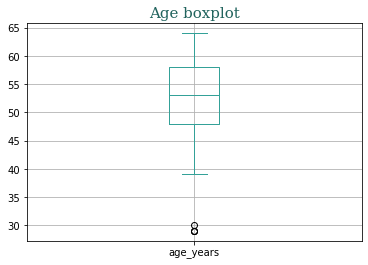

In [577]:
# Cardio_Disease['age_years'].value_counts()
import matplotlib.pyplot as plt
age_boxplot = Cardio_Disease.boxplot(column=['age_years'], color='#34A198')
plt.title("Age boxplot", family='serif',fontsize = 15, color='#21635D')
age_boxplot
plt.savefig('C:/Users/Omar/Downloads/age_boxplo.png')



#### - drop the outliers

In [578]:
Cardio_Disease['age_years'].value_counts()

55    4225
53    4166
57    3987
59    3844
49    3664
51    3601
54    3309
56    3307
58    3110
52    3043
50    2971
63    2937
60    2933
61    2932
47    2303
45    2214
43    2137
41    2004
62    1991
64    1986
39    1880
48    1705
40    1524
46    1499
44    1408
42    1315
29       3
30       1
Name: age_years, dtype: int64

In [579]:
index1 = Cardio_Disease[Cardio_Disease['age_years'] == 30 ].index

In [580]:
index2 = Cardio_Disease[Cardio_Disease['age_years'] == 29 ].index

In [581]:
# Cardio_Disease.drop(index1,inplace = True)
# Cardio_Disease.drop(index2,inplace = True)
Cardio_Disease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    69999 non-null  int64  
 1   height                    69999 non-null  float64
 2   weight                    69999 non-null  float64
 3   Systolic_blood_pressure   69999 non-null  float64
 4   Diastolic_blood_pressure  69999 non-null  float64
 5   cholesterol               69999 non-null  int64  
 6   Glucose                   69999 non-null  int64  
 7   smoke                     69999 non-null  float64
 8   Alcohol_intake            69999 non-null  int64  
 9   Physical_activity         69999 non-null  int64  
 10  cardio_disease_presence   69999 non-null  int64  
 11  age_years                 69999 non-null  int32  
dtypes: float64(5), int32(1), int64(6)
memory usage: 6.7 MB


(array([4.0000e+00, 0.0000e+00, 1.8800e+03, 4.8430e+03, 7.2580e+03,
        7.6720e+03, 1.3781e+04, 1.0841e+04, 1.3874e+04, 9.8460e+03]),
 array([29. , 32.5, 36. , 39.5, 43. , 46.5, 50. , 53.5, 57. , 60.5, 64. ]),
 <BarContainer object of 10 artists>)

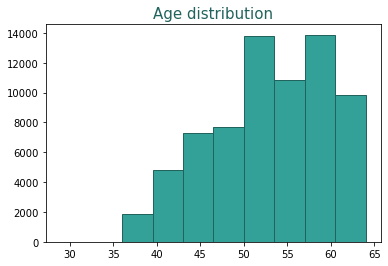

In [591]:
# 21635D
age_hist = plt.hist(Cardio_Disease['age_years'], bins = 10, color='#34A198', edgecolor = '#21635D')
plt.title('Age distribution', color = '#21635D', fontsize = 15)
plt.savefig('C:/Users/Omar/Downloads/age_distribution.png')
age_hist

#### - the average age for heart disease presence and no presence 

In [583]:
Cardio_Disease.groupby('cardio_disease_presence')[['age_years']].mean()

,age_years
cardio_disease_presence,
0,51.195112
1,54.413145


In [594]:
Cardio_Disease.age_years.value_counts()

55    4225
53    4166
57    3987
59    3844
49    3664
51    3601
54    3309
56    3307
58    3110
52    3043
50    2971
63    2937
60    2933
61    2932
47    2303
45    2214
43    2137
41    2004
62    1991
64    1986
39    1880
48    1705
40    1524
46    1499
44    1408
42    1315
29       3
30       1
Name: age_years, dtype: int64

In [584]:
Cardio_Disease.age_years.max()

64

<AxesSubplot:title={'center':'Age boxplot'}>

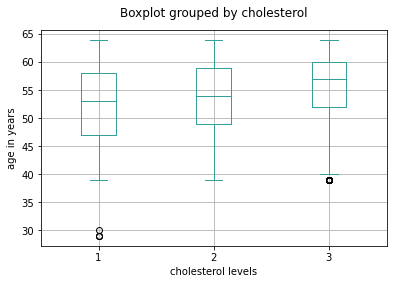

In [585]:
cholesterol_age_boxplot = Cardio_Disease.boxplot(by = 'cholesterol' , column=['age_years'], color='#34A198')
plt.title(' ')
plt.ylabel('age in years')
plt.xlabel('cholesterol levels')
plt.savefig('C:/Users/Omar/Downloads/age in years grouped by cholesterol levels.png')
age_boxplot


#### - Categorize blood pressure levels 

In [586]:
Cardio_Disease['Systolic_blood_pressure'] = Cardio_Disease.Systolic_blood_pressure.astype('int')
Cardio_Disease['Diastolic_blood_pressure'] = Cardio_Disease.Diastolic_blood_pressure.astype('int')

In [596]:
def Blood_pressure(s,d):
    if (s < 120 and d < 80):
        return 'Normal'
    elif( s >= 140 and d >= 90):
        return 'High blood pressure'
    else:
        return 'At risk'
    
# elif((120 <= s <= 139 ) and (80 <= d <= 89 )): - return 'At risk'

In [597]:
Cardio_Disease['Blood_pressure'] = Cardio_Disease.apply(lambda x: Blood_pressure(x['Systolic_blood_pressure'], x['Diastolic_blood_pressure']), axis = 1)
Cardio_Disease.Blood_pressure.unique()

array(['At risk', 'High blood pressure', 'Normal'], dtype=object)

In [598]:
Cardio_Disease.Blood_pressure.value_counts()

At risk                45262
High blood pressure    15129
Normal                  9608
Name: Blood_pressure, dtype: int64

In [599]:
Cardio_Disease.head()

,gender,height,weight,Systolic_blood_pressure,Diastolic_blood_pressure,cholesterol,Glucose,smoke,Alcohol_intake,Physical_activity,cardio_disease_presence,age_years,Blood_pressure
0,2,168.0,62.0,110,80,1,1,0.0,0,1,0,50,At risk
1,1,156.0,85.0,140,90,3,1,0.0,0,1,1,55,High blood pressure
2,1,165.0,64.0,130,70,3,1,0.0,0,0,1,51,At risk
3,2,169.0,82.0,150,100,1,1,0.0,0,1,1,48,High blood pressure
4,1,156.0,56.0,100,60,1,1,0.0,0,0,0,47,Normal
